# Togo Solar Data Discovery

### Inspection & Cleaning

In [3]:
import sys
import os


sys.path.append(os.path.abspath("../src"))
from data_loader import load_csv

file_path = "../data/togo-dapaong_qc.csv"
df = load_csv(file_path)

df.head()

2025-05-18 10:27:38,043 - INFO - Successfully loaded data from ../data/togo-dapaong_qc.csv with shape (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [5]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


#### Note

- Data looks same as Benin and Sierra Leone data so same cleaning steps will be taken.

In [6]:
# Remove comments column, change timestamp to datetime, and remove negative irradiance values
import pandas as pd

df.drop(columns=["Comments"], inplace=True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

irradiance_cols = ['GHI', 'DNI', 'DHI']
day_time_df = df[~df[irradiance_cols].lt(0).any(axis=1)]
day_time_df = day_time_df[day_time_df['GHI'] > 0]

day_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267553 entries, 343 to 525587
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      267553 non-null  datetime64[ns]
 1   GHI            267553 non-null  float64       
 2   DNI            267553 non-null  float64       
 3   DHI            267553 non-null  float64       
 4   ModA           267553 non-null  float64       
 5   ModB           267553 non-null  float64       
 6   Tamb           267553 non-null  float64       
 7   RH             267553 non-null  float64       
 8   WS             267553 non-null  float64       
 9   WSgust         267553 non-null  float64       
 10  WSstdev        267553 non-null  float64       
 11  WD             267553 non-null  float64       
 12  WDstdev        267553 non-null  float64       
 13  BP             267553 non-null  int64         
 14  Cleaning       267553 non-null  int64         
 15  Pre

In [8]:
day_time_df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,267553,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000
mean,2022-04-28 14:36:51.341977088,455.204740,297.142814,228.729565,444.203653,431.287204,29.882752,50.881561,2.899102,3.953599,0.650735,171.415919,13.122879,975.955792,0.001050,0.001555,40.023742,42.490587
min,2021-10-25 05:44:00,0.100000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.700000,13.400000
25%,2022-01-29 08:22:00,158.200000,7.300000,113.200000,145.800000,142.400000,26.400000,22.700000,1.900000,2.600000,0.500000,83.200000,10.100000,975.000000,0.000000,0.000000,32.000000,33.100000
50%,2022-05-01 10:59:00,431.700000,235.300000,211.900000,412.200000,401.200000,29.900000,55.100000,2.800000,3.900000,0.600000,202.800000,12.900000,976.000000,0.000000,0.000000,40.400000,42.700000
75%,2022-07-27 07:13:00,744.600000,548.700000,330.700000,734.200000,711.300000,33.500000,74.500000,3.800000,5.200000,0.800000,240.700000,16.000000,978.000000,0.000000,0.000000,47.800000,51.400000
max,2022-10-24 23:48:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,22.900000,4.400000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000
std,NaN,318.689138,283.500887,149.821928,317.786968,308.180073,4.819919,27.845280,1.473057,1.849164,0.264976,89.271765,5.634139,2.343213,0.032391,0.029485,10.407424,12.039009


### Outliers and detection

In [9]:
from scipy.stats import zscore
import numpy as np

# Calculate z-scores for major columns
major_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for column in major_cols:
    z_scores = zscore(day_time_df[column])
    day_time_df[f'outlier_{column}'] = (np.abs(z_scores) > 3)

outlier_summary = {col: day_time_df[f'outlier_{col}'].sum() for col in major_cols}
print("Outlier counts per column:", outlier_summary)

Outlier counts per column: {'GHI': np.int64(5), 'DNI': np.int64(0), 'DHI': np.int64(185), 'ModA': np.int64(0), 'ModB': np.int64(2), 'WS': np.int64(1011), 'WSgust': np.int64(1156)}


#### Note

- No outliers for columns DNI and ModA.
- Small number of outliers for GHI and ModB.
- Significant number for outliers for DHI, WS and WSgust.

2025-05-18 10:55:59,849 - INFO - PlotGenerator initialized successfully.
2025-05-18 10:56:01,420 - INFO - Boxplot for GHI created successfully.
2025-05-18 10:56:02,010 - INFO - Boxplot for ModB created successfully.


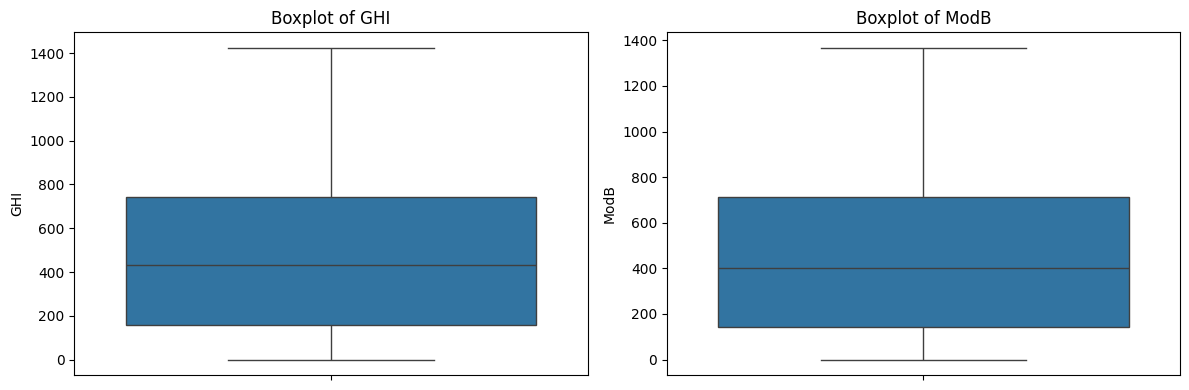

In [10]:
# boxplots for columns with small number of outliers
from plot_generator import PlotGenerator

plot_gen = PlotGenerator()
plot_gen.plot_box(df=day_time_df, columns=['GHI', 'ModB'])

#### Note

- Box plots show outliers are insignificant for these columns, and should not be handeled.

2025-05-18 10:59:27,052 - INFO - Boxplot for DHI created successfully.
2025-05-18 10:59:27,565 - INFO - Boxplot for WS created successfully.
2025-05-18 10:59:28,103 - INFO - Boxplot for WSgust created successfully.


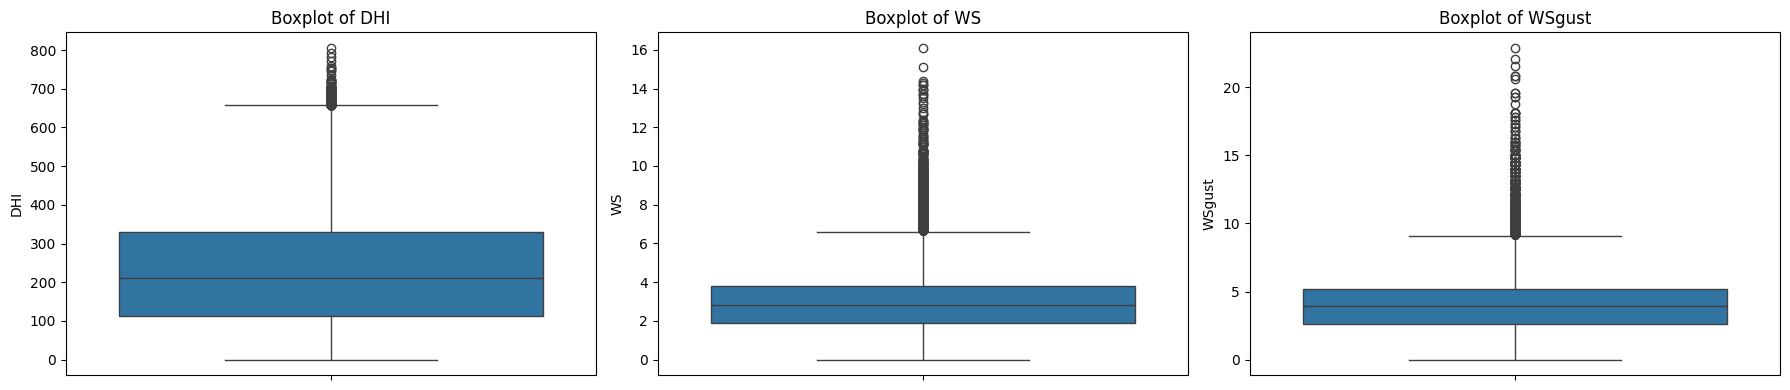

In [11]:
# boxplots for columns with large number of outliers
plot_gen.plot_box(df=day_time_df, columns=['DHI', 'WS', 'WSgust'])

2025-05-18 11:00:59,109 - INFO - Time Series for DHI created successfully.
2025-05-18 11:00:59,548 - INFO - Time Series for WS created successfully.
2025-05-18 11:00:59,991 - INFO - Time Series for WSgust created successfully.


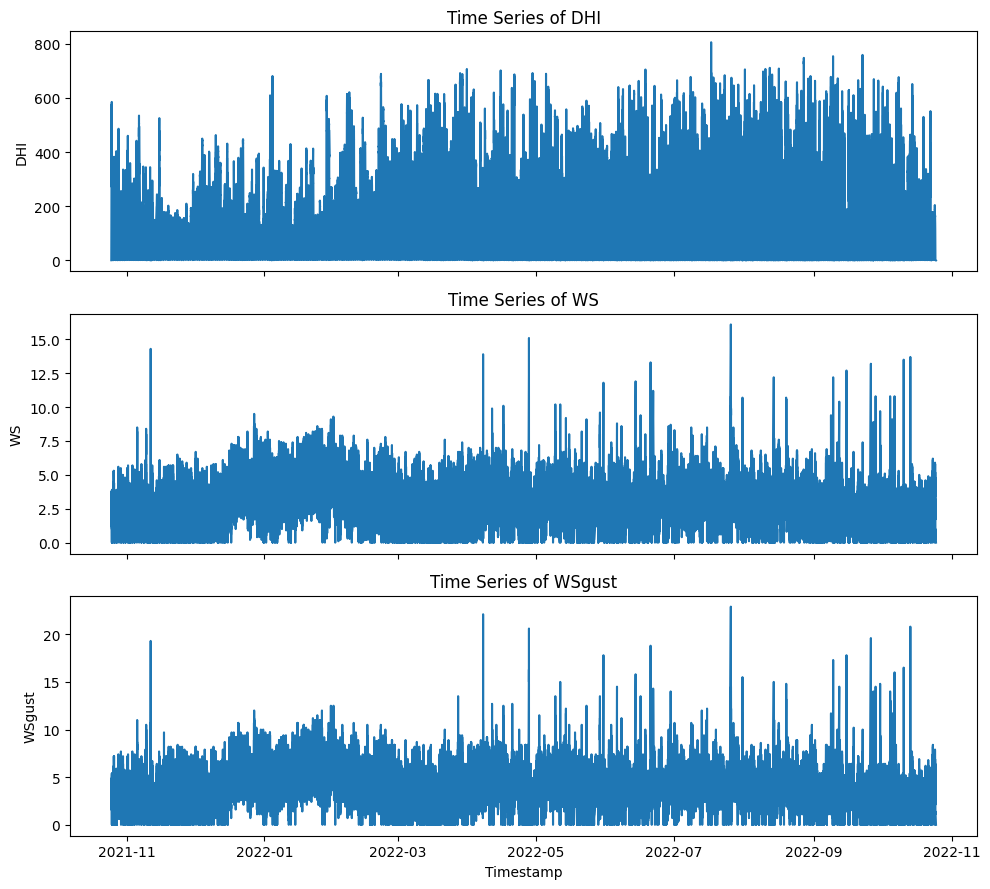

In [12]:
# TS plot for further analysis
plot_gen.plot_time_series(df=day_time_df, columns=['DHI', 'WS', 'WSgust'], time_column='Timestamp')

#### Note

- The box plots clearly indicate the presence of outliers in all three variables: DHI, WS, and WSgust, particularly on the higher end.

- Looking at the time series plots, we can see that these high values, while appearing as outliers in the box plots, seem to be part of the natural variability of the data over time. For instance, DHI shows periods of higher irradiance, and both WS and WSgust exhibit spikes indicative of stronger wind events.

- Given that these high values appear to be genuine measurements reflecting actual conditions rather than errors, it would be more appropriate to keep these data points and use them in the analysis. Removing or imputing them could lead to a loss of valuable information about the range and fluctuations of these important weather variables.

In [13]:
# Calculate z-scores for other columns
other_cols = ['Tamb', 'BP', 'Precipitation', 'TModA', 'TModB']

for column in other_cols:
    z_scores = zscore(day_time_df[column])
    day_time_df[f'outlier_{column}'] = (np.abs(z_scores) > 3)

outlier_summary = {col: day_time_df[f'outlier_{col}'].sum() for col in other_cols}
print("Outlier counts per column:", outlier_summary)

Outlier counts per column: {'Tamb': np.int64(73), 'BP': np.int64(150), 'Precipitation': np.int64(1657), 'TModA': np.int64(0), 'TModB': np.int64(260)}


#### Note

- No outliers for TModA
- significant number of outliers for other columns.

2025-05-18 11:11:34,992 - INFO - Boxplot for Tamb created successfully.
2025-05-18 11:11:35,695 - INFO - Boxplot for BP created successfully.
2025-05-18 11:11:36,175 - INFO - Boxplot for Precipitation created successfully.
2025-05-18 11:11:36,622 - INFO - Boxplot for TModB created successfully.


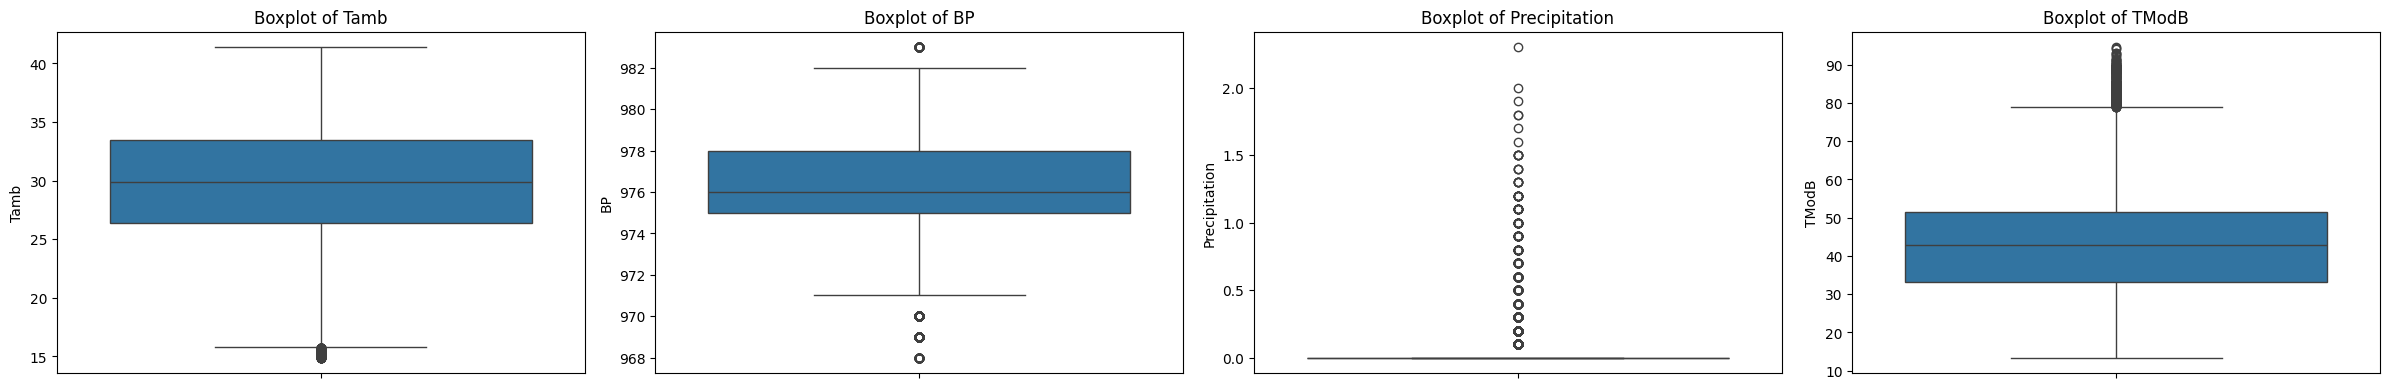

In [14]:
# boxplot for columns with outliers
plot_gen.plot_box(df=day_time_df, columns=['Tamb', 'BP', 'Precipitation', 'TModB'])

2025-05-18 11:11:58,337 - INFO - Time Series for Tamb created successfully.
2025-05-18 11:11:58,818 - INFO - Time Series for BP created successfully.
2025-05-18 11:11:59,292 - INFO - Time Series for Precipitation created successfully.
2025-05-18 11:11:59,747 - INFO - Time Series for TModB created successfully.


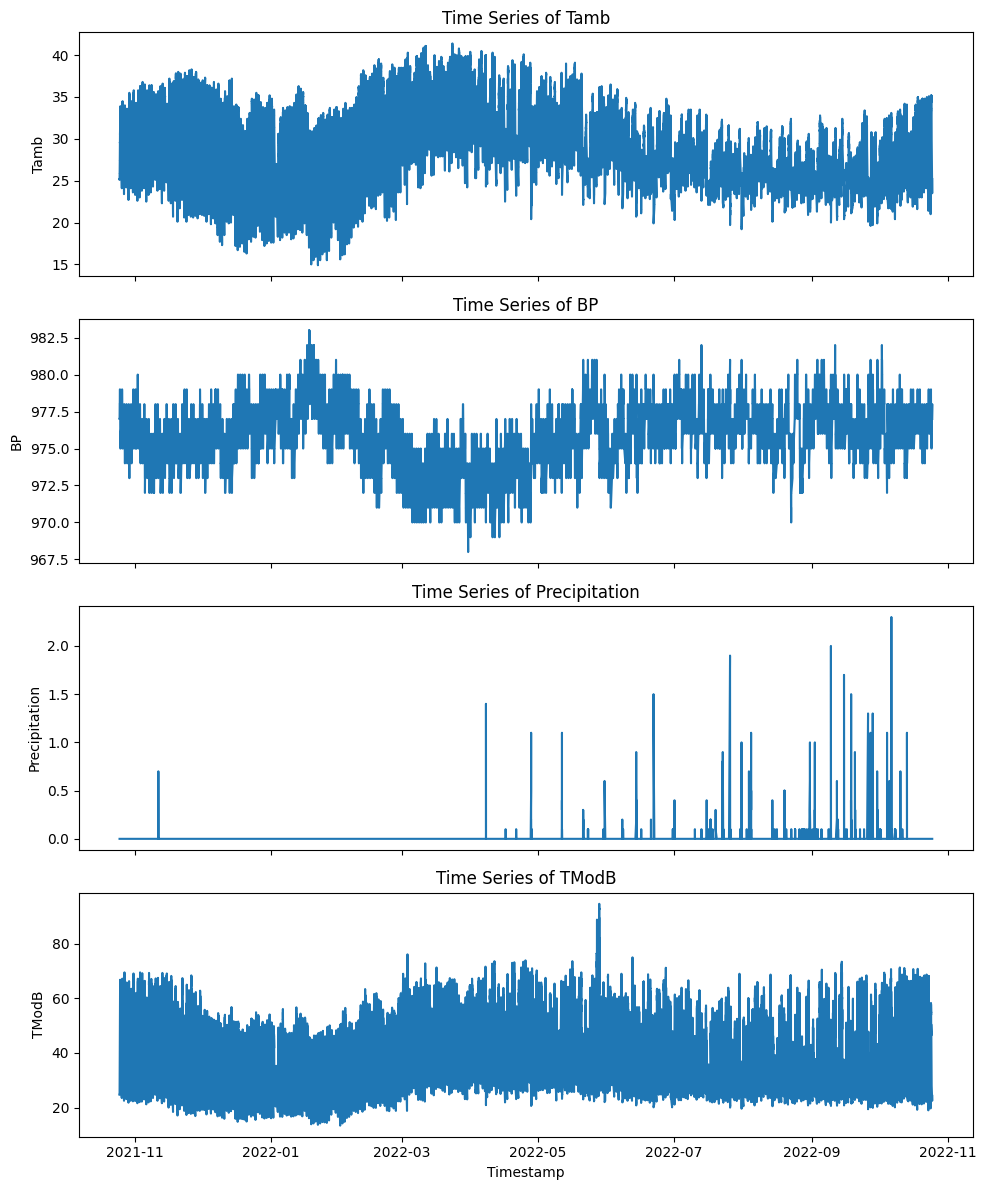

In [15]:
# TS for further analysis
plot_gen.plot_time_series(df=day_time_df, columns=['Tamb', 'BP', 'Precipitation', 'TModB'], time_column='Timestamp')

#### Note

- Similar to the previous variables, the apparent outliers in Tamb, BP, Precipitation, and TModB seem to represent genuine variations and events captured by the sensors over time.

- Therefore, my recommended approach is to retain these data points and include them in my analysis.

In [16]:
# Drop outlier columns and save clean data to csv
day_time_df.drop(columns=[f'outlier_{col}' for col in major_cols + other_cols], inplace=True)
day_time_df.to_csv("../data/togo-dapaong_qc__clean.csv", index=False)